In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}

import tensorflow as tf
from tensorflow import keras

import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import numpy as np
import seaborn as sns

from datetime import datetime
import time
import random

######################

print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.11.0
2.11.0
3.7.0
1.5.3
1.23.4
0.12.2


In [11]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
#https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/


def visualize(path):
    image = mpimg.imread(path)     

    fig, axs = plt.subplots(4, 2)
    plt.figure(figsize=(32,16))

    #-------

    axs[0, 0].set_title('Original image')
    axs[0, 0].imshow(image)
    axs[0, 0].axis('off')


    axs[0, 1].set_title('flipped image')
    flipped = tf.image.flip_left_right(image)
    axs[0, 1].imshow(flipped)
    axs[0, 1].axis('off')
    #-------
    rot = 90

    tilt = tf.image.rot90(image)
    axs[1, 0].imshow(tilt)
    axs[1, 0].axis('off')
    
    flipped = tf.image.rot90(flipped)
    axs[1, 1].imshow(flipped)
    axs[1, 1].axis('off')    

    #-------
    rot = 180

    tilt = tf.image.rot90(tilt)
    axs[2, 0].imshow(tilt)
    axs[2, 0].axis('off')

    
    flipped = tf.image.rot90(flipped)
    axs[2, 1].imshow(flipped)
    axs[2, 1].axis('off')
    
    #-------
    rot = 270

    tilt = tf.image.rot90(tilt)
    axs[3, 0].imshow(tilt)
    axs[3, 0].axis('off')

    
    flipped = tf.image.rot90(flipped)
    axs[3, 1].imshow(flipped)
    axs[3, 1].axis('off')

In [12]:
def aug_save(path):
    image = mpimg.imread(path)     

    name = path.split(".png")[0]
    name = name + "_"
    print(name)

    ext = ".png"

    #-------
    flipped = tf.image.flip_left_right(image)
    tf.keras.utils.save_img(name + "f" + ext, flipped)

    #-------
    rot = 90

    tilt = tf.image.rot90(image)
    tf.keras.utils.save_img(name + str(rot) + ext, flipped)
    
    flipped = tf.image.rot90(flipped)
    tf.keras.utils.save_img(name + "f" + str(rot) + ext, flipped)

    #-------
    rot = 180

    tilt = tf.image.rot90(tilt)
    tf.keras.utils.save_img(name + str(rot) + ext, flipped)

    flipped = tf.image.rot90(flipped)
    tf.keras.utils.save_img(name + "f" + str(rot) + ext, flipped)
    
    #-------
    rot = 270

    tilt = tf.image.rot90(tilt)
    tf.keras.utils.save_img(name + str(rot) + ext, flipped)
    
    flipped = tf.image.rot90(flipped)
    tf.keras.utils.save_img(name + "f" + str(rot) + ext, flipped)

['set_two', 'set_one', '.ipynb_checkpoints']


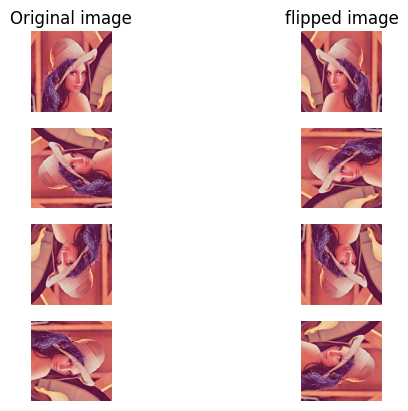

<Figure size 3200x1600 with 0 Axes>

In [13]:
examples_in_temp = "./datasets/aug_test/"

print(os.listdir(examples_in_temp))

visualize(examples_in_temp + 'set_one/lena.png')
#aug_save('lena.png')

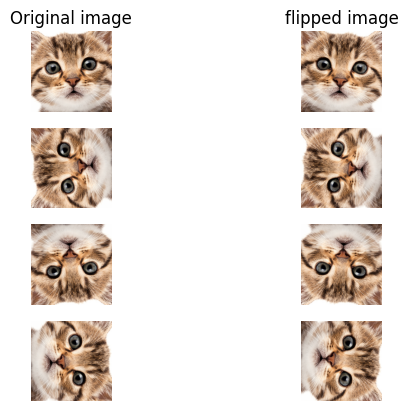

<Figure size 3200x1600 with 0 Axes>

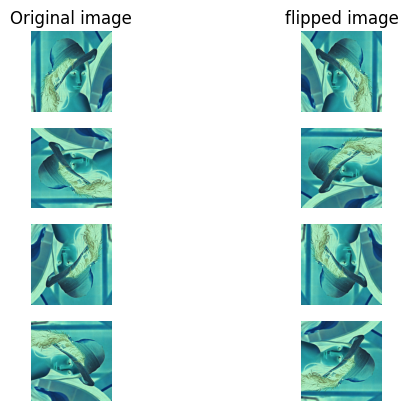

<Figure size 3200x1600 with 0 Axes>

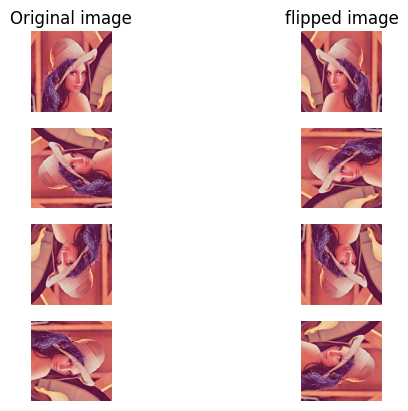

<Figure size 3200x1600 with 0 Axes>

In [14]:
# map-structure is set up to mimic kaggle: 500 birds dataset

root_map = "./datasets/aug_test/"
maps = os.listdir(root_map)

for index, item in enumerate(maps):    
    sub_maps = os.listdir(root_map + item)     
    
    for sub_index, sub_item in enumerate(sub_maps):  
        #print(sub_index, root_map + "/" + maps[index] + "/" + sub_item)
        visualize(root_map + "/" + maps[index] + "/" + sub_item)
        #aug_save(root_map + "/" + maps[index] + "/" + sub_item)
        